In [1]:
import pandas as pd
import numpy as np

In [2]:
# concatenate three worksheets
df1 = pd.read_excel('Climate.xls', '2007')
df2 = pd.read_excel('Climate.xls', '2010')
df3 = pd.read_excel('Climate.xls', '2012')
df=pd.concat([df1,df2,df3])

In [3]:
  # change objects to numeric
  df['Energy (GJ)'] =pd.to_numeric(df['Energy (GJ)'], errors='coerce')
  df['CO2E (t)']  =pd.to_numeric(df['CO2E (t)'], errors='coerce')

In [3]:
df.describe(include = "O")

,Regional District,Local Govt Name,Local Govt Type,Sector,Data Type,Subsector Desc,Measurement Desc,Connections,Consumption,Units,Avg VKT,Energy (GJ),CO2E (t),
count,8632,8632,8632,8632,8632,8632,8632,8632,8632,8632,3374,8632,8632,8632
unique,30,197,10,5,2,23,11,2517,6149,5,163,5415,4463,1
top,Metro-Vancouver,North Vancouver,City,Buildings,Core,Residential,Deforestation,1,0,GJ,0,0,0,
freq,2186,196,2555,4486,8385,3313,1498,2110,1522,3493,1197,2231,1214,8632


In [165]:
df.columns

Index(['Report Year', 'Local Govt ID', 'Regional District', 'Local Govt Name',
       'Local Govt Type', 'Population', 'Sector', 'Data Type',
       'Subsector Desc', 'Measurement Desc', 'Connections', 'Consumption',
       'Units', 'Avg VKT', 'Energy (GJ)', 'CO2E (t)', 'Connections Per Capita',
       ' '],
      dtype='object')

In [4]:
#list observations for each variable like so
df["Local Govt Type"].unique()

array(['Regional District', 'Regional District Unincorporated Areas',
       'City', 'District Municipality', 'Village', 'Town',
       'Island Trust Area', 'Island Municipality',
       'Regional Municipality', 'Indian Government District'],
      dtype=object)

In [4]:

#subset dataframes on sectors or regions
luc=df[df.Sector=='Land-use Change - Deforestation']
tran=df[df.Sector=='On-Road Transportation']
bldg=df[df.Sector=='Buildings']
waste=df[df.Sector=='Solid Waste']
ag=df[df.Sector=='Agriculture']
min=df[df["Subsector Desc"]=='Mining']
rm=df[(df["Local Govt Type"]=='Regional Municipality')|(df["Local Govt Type"]=='Island Trust Area')|(df["Local Govt Type"]=='Regional District Unincorporated Areas')|(df["Local Govt Type"]=='Indian Government District')|(df["Local Govt Type"]=='Village')]
rm2=df[(df["Local Govt Type"]=='City')|(df["Local Govt Type"]=='Island Municipality')|(df["Local Govt Type"]=='Town')|(df["Local Govt Type"]=='District Municipality')|(df["Local Govt Type"]=='Regional District')]

In [6]:
#pivot df by local govt type and popultn, emissions or energy use
a=df.pivot_table(index='Report Year', columns='Local Govt Type', values='Population', aggfunc='sum').transpose()
b=df.pivot_table(index='Report Year', columns='Local Govt Type', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
c=df.pivot_table(index='Report Year', columns='Local Govt Type', values='Energy (GJ)', aggfunc='sum').round(decimals=0).transpose()
#pivot df or subset by sector/sub-sector and emissions
d=df.pivot_table(index='Report Year', columns='Sector', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
e=df.pivot_table(index='Report Year', columns='Subsector Desc', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
f=luc.pivot_table(index='Report Year', columns='Subsector Desc', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
g=tran.pivot_table(index='Report Year', columns='Subsector Desc', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
h=bldg.pivot_table(index='Report Year', columns='Subsector Desc', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
i=waste.pivot_table(index='Report Year', columns='Subsector Desc', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
j=ag.pivot_table(index='Report Year', columns='Subsector Desc', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
#pivot by region and emissions or population
k=df.pivot_table(index='Report Year', columns='Regional District', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
l=df.pivot_table(index='Report Year', columns='Regional District', values='Population', aggfunc='sum').round(decimals=0).transpose()
m=df.pivot_table(index='Report Year', columns='Local Govt Type', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
n=df.pivot_table(index='Report Year', columns='Local Govt Type', values='Population', aggfunc='sum').round(decimals=0).transpose()
#pivot by source or population
o=rm.pivot_table(index='Report Year', columns='Measurement Desc', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
o1=rm.pivot_table(index='Report Year', columns='Measurement Desc', values='Energy (GJ)', aggfunc='sum').round(decimals=0).transpose()
o2=rm2.pivot_table(index='Report Year', columns='Measurement Desc', values='CO2E (t)', aggfunc='sum').round(decimals=0).transpose()
o3=rm2.pivot_table(index='Report Year', columns='Measurement Desc', values='Energy (GJ)', aggfunc='sum').round(decimals=0).transpose()

In [7]:
#show pivot table, sorted and rounded, for top ten values in 2012 year (a ratio of per capita emissions)
round((m/n).sort_values(by=2012, ascending=False),2).head(10)

Report Year,2007,2010,2012
Local Govt Type,,,
Regional Municipality,1.52,1.44,0.69
Island Trust Area,0.31,0.32,0.33
Regional District Unincorporated Areas,0.29,0.28,0.27
Indian Government District,0.36,0.33,0.20
Village,0.37,0.37,0.19
Regional District,0.20,0.17,0.17
District Municipality,0.23,0.21,0.17
Town,0.32,0.32,0.16
Island Municipality,0.21,0.20,0.12


In [8]:
# rank a column in descending order but with the numbers ascending
(o2[[2012]]/1000).rank(ascending=False).sort_values(by=2012, ascending=True).head(10)

Report Year,2012
Measurement Desc,
Natural Gas,1.0
Gasoline,2.0
Diesel Fuel,3.0
Solid Waste,4.0
Methane,5.0
Electricity,6.0
Heating Oil,7.0
Propane,8.0
Deforestation,9.0


<AxesSubplot:xlabel='Report Year'>

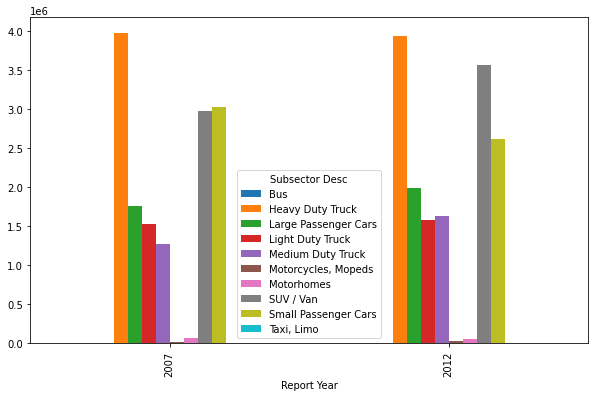

In [10]:
# plot a bar chart for a emissions of a subsector between two periods
(g[[2007,2012]]).transpose().plot.bar(figsize=(10, 6))